# Model specification

## Model definition

We have 2 interconnected neural populations, one excitatory ($E$) and one inhibitory ($I$), which interactions are parametrized by coupling coefficients $c_{xy} \in \mathbb{R}^+$ with $x,y \in \{e,i\}$. So, for a given population $x$ we have the following local coupling: $\big(c_{xe}E-c_{xi}I\big)$.

[Note: capital letters $E$, $I$ refer to state variables, and lower case letters $e$, $i$ specify parameter association to neural population] 

In the case of a coupled system, the excitatory population (potentially) receives input from other excitatory populations elsewhere in the brain through a network input term $N_{input}(t)$ that can be set to 0 if modelling a single node dynamics. 

Here we will consider it to be defined for a given node $n$ in a network $M$ as delayed coupling propagated through some connectivity matrices of coupling strength ($A$) and axonal distance ($D$) e.g., derived from diffusion weighted MRI (DWI) and parametrized by a global scaling factor ($G$) and a conduction speed term ($K$): $$N_{input}(t) = G\sum_{m\in M}A_{nm}E_m(t-\frac{D_{nm}}{K})$$ 

The input to each neural population is subject to a threshold parameter $\theta_x$ and passed through a sigmoid activation function $S_x(X)$ with a parametrized slope $a_x$ that operates on $X$, the total (thresholded) input to the population: 
 
$$S_x(X) = \frac{1}{1+e^{-a_x \cdot X}}, \hspace{0.25mm} x \in \{e,i\}$$


The activation response is the scaled by a parametrized refractory term $(k_x - r_x x)$ enabling only some subset of the neural population to respond to the input (unless set to $k_x=1,r_x=0$). 

Finally, the temporal scale for the dynamics of each population is parametrized by the time constants $\tau_x$. 

This gives us the following system:
\begin{align*}
\tau_e\frac{dE}{dt} &= -E + (k_e - r_e E) \cdot S_e\big(c_{ee}E-c_{ei}I + N_{input}(t) - \theta_e\big)\\
\tau_i\frac{dI}{dt} &= -I + (k_i - r_i I) \cdot S_i\big(c_{ie}E-c_{ii}I - \theta_i\big)
\end{align*}


## Jacobian of the system

The jacobian of the system is defined as the matrix
\begin{align*}
    J &= 
    \begin{pmatrix} 
        \frac{d\dot{E}}{dE}  & \frac{d\dot{E}}{dI} \\
        \frac{d\dot{I}}{dE}  & \frac{d\dot{I}}{dI}  
    \end{pmatrix}\\
\end{align*}

[Note: $\dot{Y}=\frac{dY}{dt}$]

Which entries can be found to be defined by
\begin{align*}
\tau_e\frac{d\dot{E}}{dE} &= -1 - \frac{r_e}{\left(1+e^{-a_e \cdot \left(c_{ee}E-c_{ei}I + N_{input}(t) - \theta_e\right)}\right)} + (k_e - r_e E)\cdot\frac{a_e c_{ee} \cdot e^{-a_e \cdot \left(c_{ee}E-c_{ei}I + N_{input}(t) - \theta_e\right)}}{\left(1+e^{-a_e \cdot \left(c_{ee}E-c_{ei}I + N_{input}(t) - \theta_e\right)}\right)^2} \\
\tau_e\frac{d\dot{E}}{dI} &= (k_e - r_e E)\cdot \frac{-a_e c_{ei} \cdot e^{-a_e \cdot \left(c_{ee}E-c_{ei}I + N_{input}(t) - \theta_e\right)}}{\left(1+e^{-a_e \cdot \left(c_{ee}E-c_{ei}I + N_{input}(t) - \theta_e\right)}\right)^2}\\
\tau_i\frac{d\dot{I}}{dE} &= (k_i - r_i I)\cdot \frac{a_i c_{ie} \cdot e^{-a_i \cdot \left(c_{ie}E-c_{ii}I - \theta_i\right)}}{\left(1+e^{-a_i \cdot \left(c_{ie}E-c_{ii}I - \theta_i\right)}\right)^2}\\
\tau_i\frac{d\dot{I}}{dI} &= -1 - \frac{r_i}{\left(1+e^{-a_i \cdot \left(c_{ie}E-c_{ii}I - \theta_i\right)}\right)} + (k_i - r_i I)\cdot \frac{-a_i c_{ii} \cdot  e^{-a_i \cdot \left(c_{ie}E-c_{ii}I - \theta_i\right)}}{\left(1+e^{-a_i \cdot \left(c_{ie}E-c_{ii}I - \theta_i\right)}\right)^2}
\end{align*}
Full derivation available at the "../detailed_derivations/WC_stability_analysis.pdf" path.

## Nullclines

The nullcines of the system can be found to be 
\begin{align*}
    E_{null} &=\frac{-\ln \left(\frac{-r_i I+k_i}{I}-1\right)+a_i c_{ii} I+a_i \theta_i}{a_i c_{ie}}\\
    I_{null} &=-\frac{-\ln \left(\frac{-r_e E+k_e}{E}-1\right)-a_e c_{ee}E+a_e \theta_e -a_e N_{input}(t) }{a_e c_{ei}}\\
\end{align*}

Full derivation available at the "../detailed_derivations/WC_stability_analysis.pdf" path.

## Fixed point localization

Given that the intersection of the nullclines does not have an analytical solution (at least to my knowledge), a numerical estimation is required. We can define functions $h_E(E)$, $h_I(I)$ and apply the newton root finding method on $h_X(X)$ with $(X,Y) \in \{(E,I),(I,E)\}$:
\begin{align*}
    h_X(X) &= X - X_{null}\big(Y_{null}(X)\big)\\
    X_{k+1} &= X_k - \frac{h_X(X_k)}{\frac{dh_X}{dX}\big|_{X_k}}\\
    \text{Where,}\hspace{0.3mm}\frac{dh_X}{dX}\bigg|_X &= \frac{d}{dX}\bigg[X - X_{null}\big(Y_{null}(X)\big)\bigg]\\
    & = 1 - \frac{d}{dX}\bigg[X_{null}\big(Y_{null}(X)\big)\bigg]\\
    &= 1 -  \frac{dX_{null}}{dY_{null}}\bigg|_{Y_{null}(X)}  \frac{dY_{null}}{dX}\bigg|_{X}\\    
\end{align*}

This requires us to find the derivatives of the nullclines which can be found to be:

\begin{align*}
    \frac{dE_{null}}{dI}&=\frac{k_i + c_{ii}+\theta_i}{1 + a_i c_{ie}^2 k_i I-a_i c_{ie}^2I^2 (r_i +1 )}\\
    \frac{dI_{null}}{dE}&=\frac{k_e - c_{ee}+\theta_e - N_{input}(t)}{1 + a_e c_{ei}^2 k_e E-a_e c_{ei}^2E^2 (r_e +1 )}\\
\end{align*}
The full derivation available at the "../detailed_derivations/WC_stability_analysis.pdf" path.

## Fixed point classification

We can use the eigenvalues of the jacobian around the fixed points to classify the fixed points.

We have
\begin{align*}
    J(E^*,I^*) &= 
    \begin{pmatrix} 
        \frac{d\dot{E}}{dE}\big|_{E^*}  & \frac{d\dot{E}}{dI} \big|_{E^*} \\
        \frac{d\dot{I}}{dE}\big|_{I^*}  & \frac{d\dot{I}}{dI} \big|_{I^*}  
    \end{pmatrix}\\
\end{align*}
From which we can derive the eigenvalues $\lambda$ as
\begin{align*}
    \lambda(E^*,I^*) &= \frac{(\frac{d\dot{E}}{dE}\big|_{E^*}+\frac{d\dot{I}}{dI}\big|_{I^*})\pm \sqrt{(\frac{d\dot{E}}{dE}\big|_{E^*}+\frac{d\dot{I}}{dI}\big|_{I^*})^2 - 4 \big(\frac{d\dot{E}}{dE}\big|_{E^*} \cdot \frac{d\dot{I}}{dI}\big|_{I^*}-\frac{d\dot{E}}{dI}\big|_{E^*} \cdot \frac{d\dot{I}}{dE}\big|_{I^*})}}{2}
\end{align*}

# Model Code

In [1]:
import numba
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dcp 
parameter_index_mapping = {
    "c_ee": 0, "c_ei": 1, "c_ie": 2, "c_ii": 3, 
    "tau_e": 4, "tau_i": 5,
    "theta_e": 6, "theta_i": 7,
    "a_e": 8, "a_i": 9,
    "k_e": 10, "k_i": 11, "r_e": 12, "r_i": 13,
    "noise_E": 14, "noise_I": 15,
}
parameter_latex_mapping = {
    "c_ee": "$c_{{{ee}}}$", "c_ei": "$c_{{{ei}}}$", "c_ie": "$c_{{{ie}}}$", "c_ii": "$c_{{{ii}}}$", 
    "tau_e": "$\\tau_e$", "tau_i": "$\\tau_i$",
    "theta_e": "$\\theta_e$", "theta_i": "$\\theta_i$",
    "a_e": "$a_e$", "a_i": "$a_i$",
    "k_e": "$k_e$", "k_i": "$k_i$", "r_e": "$r_e$", "r_i": "$r_i$",
    "noise_E": "$Noise_E$", "noise_I": "$Noise_I$",
}
parameter_names = [par for par in parameter_index_mapping]

## Model dynamics

In [2]:
@numba.njit
def fn_Edot(E,I, params, global_input):
    return (-E + (params[10] - params[12] * E) * 1.0 / (1 + np.exp(-params[8] * (params[0] * E - params[1] * I - params[6] + global_input))))/params[4]
@numba.njit
def fn_Idot(E, I, params):
    return (-I + (params[11] - params[13] * I) * 1.0 / (1 + np.exp(-params[9] * (params[2] * E - params[3] * I - params[7]))))/params[5]

## Jacobian

In [3]:
@numba.njit
def fn_Edot_E(E, I, params, global_input):
    Edot_E = 1/params[4] * (-1 - (params[12]/(1 + np.exp(-params[8] * (params[0] * E - params[1] * I + global_input - params[6])))) + (params[10] - params[12] * E) * (( np.exp(-params[8] * (params[0] * E - params[1] * I + global_input - params[6])) * (params[8] * params[0]))/(1 + np.exp(-params[8] * (params[0] * E - params[1] * I + global_input - params[6])))**2))
    return Edot_E
@numba.njit
def fn_Edot_I(E, I, params, global_input):
    Edot_I = 1/params[4] * ((params[10] - params[12] * E) * (( np.exp(-params[8] * (params[0] * E - params[1] * I + global_input - params[6])) * (-params[8] * params[1]))/(1 + np.exp(-params[8] * (params[0] * E - params[1] * I + global_input - params[6])))**2))
    return Edot_I
@numba.njit
def fn_Idot_E(E, I, params):
    Idot_E = 1/params[5] * ((params[11] - params[13] * I) * (( np.exp(-params[9] * (params[2] * E - params[3] * I - params[7])) * (params[9] * params[2]))/(1 + np.exp(-params[9] * (params[2] * E - params[3] * I - params[7])))**2))
    return Idot_E
@numba.njit
def fn_Idot_I(E, I, params):
    Idot_I = 1/params[5] * (-1 - (params[13]/(1 + np.exp(-params[9] * (params[2] * E - params[3] * I - params[7])))) + (params[11] - params[13] * I) * (( np.exp(-params[9] * (params[2] * E - params[3] * I - params[7])) * (-params[9] * params[3]))/(1 + np.exp(-params[9] * (params[2] * E - params[3] * I - params[7])))**2))
    return Idot_I
@numba.njit
def get_jac(E,I, params, global_input):
    Edot_E = fn_Edot_E(E, I, params, global_input)
    Edot_I = fn_Edot_I(E, I, params, global_input)
    Idot_E = fn_Idot_E(E, I, params)
    Idot_I = fn_Idot_I(E, I, params)
    return Edot_E,Edot_I,Idot_E,Idot_I

## Nullclines

In [4]:
@numba.njit
def fn_E_nullcline(I,params, global_input):
    log_component = np.log((-params[13] * I + params[11])/I -1)
    return (params[9]*params[3]*I + params[9]*params[7] - log_component)/(params[9]*params[2])
@numba.njit
def fn_I_nullcline(E,params, global_input):
    log_component = np.log((-params[12] * E + params[10])/E -1)
    return -(params[8]*params[6] - params[8]*params[0]*E - log_component - params[8]*global_input)/(params[8]*params[1])

## Fixed point localization

### h functions

In [5]:

@numba.njit
def fn_h_E(E, params, global_input):
    return E - fn_E_nullcline(fn_I_nullcline(E, params, global_input), params, global_input)

@numba.njit
def fn_h_I(I, params, global_input):
    return I - fn_I_nullcline(fn_E_nullcline(I, params, global_input), params, global_input)

@numba.njit
def fn_E_nullcline_prime(I,params, global_input):
    numerator = params[11] + params[3] + params[7]
    denominator = 1 + params[9] * params[2]**2 * params[11] * I - params[9] * params[2]**2 * I**2 * (params[13] + 1)
    return numerator/denominator
@numba.njit
def fn_I_nullcline_prime(E,params, global_input):
    numerator = params[10] - params[0] + params[6] - global_input
    denominator = 1 + params[8] * params[1]**2 * params[10] * E - params[8] * params[1]**2 * E**2 * (params[12] + 1)
    return numerator/denominator

@numba.njit
def fn_h_E_prime(E,params, global_input):
    dInull_dE = fn_I_nullcline_prime(E,params, global_input)
    Inull_E = fn_I_nullcline(E,params, global_input)
    dE_null_dI_at_Inull_E = fn_E_nullcline_prime(Inull_E,params, global_input)
    return 1 - dE_null_dI_at_Inull_E * dInull_dE

@numba.njit
def fn_h_I_prime(I,params, global_input):
    dEnull_dI = fn_E_nullcline_prime(I,params, global_input)
    Enull_I = fn_E_nullcline(I,params, global_input)
    dI_null_dE_at_Enull_I = fn_I_nullcline_prime(Enull_I,params, global_input)
    return 1 - dI_null_dE_at_Enull_I * dEnull_dI

### Newton step

In [6]:
@numba.njit
def fn_newton_step_h_E(E, params, global_input, damp = 1.0):
    h_E = fn_h_E(E, params, global_input)
    h_E_prime = fn_h_E_prime(E, params, global_input)
    return E - damp * h_E/h_E_prime
@numba.njit
def fn_newton_step_h_I(I, params, global_input, damp = 1.0):
    h_I = fn_h_I(I, params, global_input)
    h_I_prime = fn_h_I_prime(I, params, global_input)
    return I - damp * h_I/h_I_prime

@numba.njit
def newton_iterate_h_E(E_0,params, global_input, damp = 0.25, n_iters = 10000):
    E_vals = np.zeros((2,params.shape[-1]))
    I_vals = np.zeros((2,params.shape[-1]))
    E_vals[0] = E_0
    I_vals[0] =  fn_I_nullcline(E_vals[0],params,global_input)
    for newt_step in range(n_iters):
        newt_step_0 = newt_step%2
        newt_step_1 = (newt_step+1)%2
        E_vals[newt_step_1] = fn_newton_step_h_E(E_vals[newt_step_0], params, global_input, damp = damp)
        I_vals[newt_step_1] =  fn_I_nullcline(E_vals[newt_step_1],params,global_input)
    return E_vals[newt_step_1], I_vals[newt_step_1]

@numba.njit
def newton_iterate_h_I(I_0,params, global_input, damp = 0.25, n_iters = 10000):
    E_vals = np.zeros((2,params.shape[-1]))
    I_vals = np.zeros((2,params.shape[-1]))
    I_vals[0] = I_0
    E_vals[0] =  fn_E_nullcline(I_vals[0],params,global_input)
    for newt_step in range(n_iters):
        newt_step_0 = newt_step%2
        newt_step_1 = (newt_step+1)%2
        I_vals[newt_step_1] = fn_newton_step_h_I(I_vals[newt_step_0], params, global_input, damp = damp)
        E_vals[newt_step_1] =  fn_E_nullcline(I_vals[newt_step_1],params,global_input)
    return E_vals[newt_step_1], I_vals[newt_step_1]

@numba.njit
def multi_start_h_X(parameters,state_space,n_starts,n_iters, global_input = 0, damp = 0.05, edge_res = -3, init_at_nullclines = True):
    params = parameters.T
    edge_starts = n_starts//5
    mid_starts = int(n_starts - (2 * edge_starts))
    Es = np.zeros((n_starts,params.shape[-1]))
    Is = np.zeros((n_starts,params.shape[-1]))
    log_step = np.logspace(-15,edge_res,edge_starts)
    Es[:edge_starts] = (state_space[0][0] + log_step)[:,None]
    Es[edge_starts:edge_starts + mid_starts] = np.linspace(state_space[0][0]+log_step[-1],state_space[0][1]-log_step[-1],mid_starts)[:,None]
    Es[edge_starts + mid_starts:] = (state_space[0][1] - log_step[::-1])[:,None]
    Is[:edge_starts] = (state_space[1][0] + log_step)[:,None]
    Is[edge_starts:edge_starts + mid_starts] = np.linspace(state_space[1][0]+log_step[-1],state_space[1][1]-log_step[-1],mid_starts)[:,None]
    Is[edge_starts + mid_starts:] = (state_space[1][1] - log_step[::-1])[:,None]
    if init_at_nullclines:
        init_E = fn_E_nullcline(Is, params,global_input)
        init_I = fn_I_nullcline(Es, params,global_input)
    else:
        init_E = Es
        init_I = Is
    x_h_X = np.zeros((2,2,n_starts,parameters.shape[0]))
    for j,E_0 in enumerate(init_E):
        x_h_X[0,0,j],x_h_X[1,0,j] = newton_iterate_h_E(E_0,params,global_input,damp=damp, n_iters = n_iters)
    for j,I_0 in enumerate(init_I):
        x_h_X[0,1,j],x_h_X[1,1,j] = newton_iterate_h_I(I_0,params,global_input,damp=damp, n_iters = n_iters)
    return x_h_X

def get_FPs(parameters,  global_input, state_space, n_starts, n_iters, unique_threshold=6, damp=0.05, init_at_nullclines=True, return_counts = False, edge_res = -3):
    x_h_X = multi_start_h_X(parameters,state_space,n_starts,n_iters, global_input=global_input, damp=damp, init_at_nullclines=init_at_nullclines, edge_res=edge_res)
    x_h_X[np.isnan(x_h_X)] = -1
    x_h_X[np.isinf(x_h_X)] = -1
    x_h = x_h_X.reshape((2,-1,parameters.shape[0]))
    unique_points = []
    for s in range(parameters.shape[0]):
        pts, cts = np.unique(np.round(x_h[...,s],unique_threshold).T,axis = 0, return_counts=True)
        pts_ok = (pts==-1).sum(-1)==0
        pts_kept = pts[pts_ok,:]
        cts_kept = cts[pts_ok]
        if return_counts:
            unique_points.append([pts_kept,cts_kept])
        else:
            unique_points.append(pts_kept)
    return unique_points

def get_Es_Is_log_edges(state_space, n_points, edge_res = -3):
    edge_points = n_points//5
    mid_points = int(n_points - (2 * edge_points))
    Es = np.zeros((n_points))
    Is = np.zeros((n_points))
    log_step = np.logspace(-15,edge_res,edge_points)
    Es[:edge_points] = (state_space[0][0] + log_step)
    Es[edge_points:edge_points + mid_points] = np.linspace(state_space[0][0]+log_step[-1],state_space[0][1]-log_step[-1],mid_points)
    Es[edge_points + mid_points:] = (state_space[0][1] - log_step[::-1])
    Is[:edge_points] = (state_space[1][0] + log_step)
    Is[edge_points:edge_points + mid_points] = np.linspace(state_space[1][0]+log_step[-1],state_space[1][1]-log_step[-1],mid_points)
    Is[edge_points + mid_points:] = (state_space[1][1] - log_step[::-1])
    return Es, Is
    

## Fixed point classification

In [7]:
@numba.njit
def get_lambdas(E, I, params, global_input):
    Edot_E, Edot_I, Idot_E, Idot_I = get_jac(E,I, params, global_input)
    tr = np.asarray(Edot_E + Idot_I, dtype = np.complex128)
    det = np.asarray(Edot_E * Idot_I - Edot_I * Idot_E, dtype = np.complex128)
    discriminant = (tr**2 - 4 * det)
    lambda_0 = tr/2 + np.sqrt(discriminant)/2
    lambda_1 = tr/2 - np.sqrt(discriminant)/2
    return lambda_0, lambda_1, discriminant

def classify_fixed_points(
                            fixed_points, parameters, global_input,
                            imag_threshold = 0.85, real_threshold = 0.75,
                            norm_imag_lambdas = True
        ):
    fp_class = []
    eigval = []
    for sim_sel in range(len(fixed_points)):
        fp_class.append([])
        eigval.append([])
        max_real_val = 1e-10
        for fp in range(len(fixed_points[sim_sel])):
            if isinstance(global_input,float) or isinstance(global_input,int):
                g_inp = global_input
            else:
                g_inp = global_input[sim_sel]
            lambda_0, lambda_1, discriminant = get_lambdas(
                                                            fixed_points[sim_sel][fp][0], fixed_points[sim_sel][fp][1],
                                                            parameters[sim_sel], g_inp
                                            )
            real_0, real_1 = np.real(lambda_0),np.real(lambda_1)
            imag_0, imag_1 = np.imag(lambda_0),np.imag(lambda_1)
            if norm_imag_lambdas: # To make thresholding more consistent
                lambda_0_norm = np.sqrt(real_0**2+imag_0**2)
                lambda_1_norm = np.sqrt(real_1**2+imag_1**2)
                real_0, imag_0 = real_0, imag_0/lambda_0_norm
                real_1, imag_1 = real_1, imag_1/lambda_1_norm
                lambda_0 = real_0 + imag_0*1j
                lambda_1 = real_1 + imag_1*1j
            max_real_val = max(max_real_val, abs(min(real_1, real_0))) # Keeps track of the most stable FP's real value (magnitude)
            eigval[sim_sel].append([lambda_0, lambda_1, discriminant])
        for fp in range(len(fixed_points[sim_sel])):
            real_0, real_1 = np.real(eigval[sim_sel][fp][0])/max_real_val, np.real(eigval[sim_sel][fp][1])/max_real_val
            imag_0, imag_1 = np.imag(eigval[sim_sel][fp][0]), np.imag(eigval[sim_sel][fp][1])
            spins = 1
            stable = 1
            if np.abs(imag_0) > imag_threshold or np.abs(imag_1) > imag_threshold: # Complex values big enough
                spins = -1
            if real_0 > real_threshold and real_1 > real_threshold: 
                # Real values both positive and stronger than the 
                stable = 1 # Stable 
            elif real_0 < 0 and real_1 < 0: 
                # Real values both negative
                stable = 2 # Stable 
            elif np.abs(real_0) < real_threshold and np.abs(real_1) < real_threshold: 
                # They are not negative but below threshold
                stable = 3 # Neutral or much weaker than the strongest stable FP
            elif (real_0 < 0 and real_1 >= 0) or (real_1 < 0 and real_0 >= 0):
                # One is positive and one is negative
                stable = 4 # Saddle 
            fp_class[sim_sel].append(spins * stable)
    return fp_class, eigval

# Example analysis code

In [8]:
parameters_default = np.array([
                                16.0, 12.00, 15.0, 3.00,                 #c_xx
                                15.0, 15.0,                             #tau_x
                                2.75, 3.7,                              #theta_x
                                1.4, 2.00,                               #a_x
                                1.0, 1.0, 1.0, 1.0,                     #k_x, r_x
                                0.0000e-06, 0.0000e-06                  #noise
                    ])

## Phase plane and fixed point localization

In [9]:
bifpar = "theta_e"
bif_space = np.linspace(0.0,3,4)
parameters = np.zeros((bif_space.shape[0],parameters_default.shape[0])) + parameters_default[None,:]
parameters[:,parameter_index_mapping[bifpar]] = bif_space

In [10]:
n_starts = 500
n_iters = 7500
state_space = np.array([[1e-15,0.5-1e-15],[1e-15,0.5-1e-15]])
unique_points = get_FPs(
                        parameters,  0, state_space, n_starts, n_iters,
                        unique_threshold=5, damp=0.025, init_at_nullclines=True, return_counts = False, edge_res=-3
            )

In [11]:
fp_coding = {
    -4:'k *', # Should not exist (numerical artifact)
    -3:'b *', # Either a limit cycle or a very weakly stable/unstable spiral
    -2:'g *', # Stable spiral
    -1:'r *', # Unstable spiral
    1:'r X',  # Unstable node
    2:'g X',  # Stable node
    3:'b X',  # Either a neutral point or a very weakly stable/unstable node
    4:'k X'   # Saddle node
}
fp_class = classify_fixed_points(unique_points,parameters,0)[0]

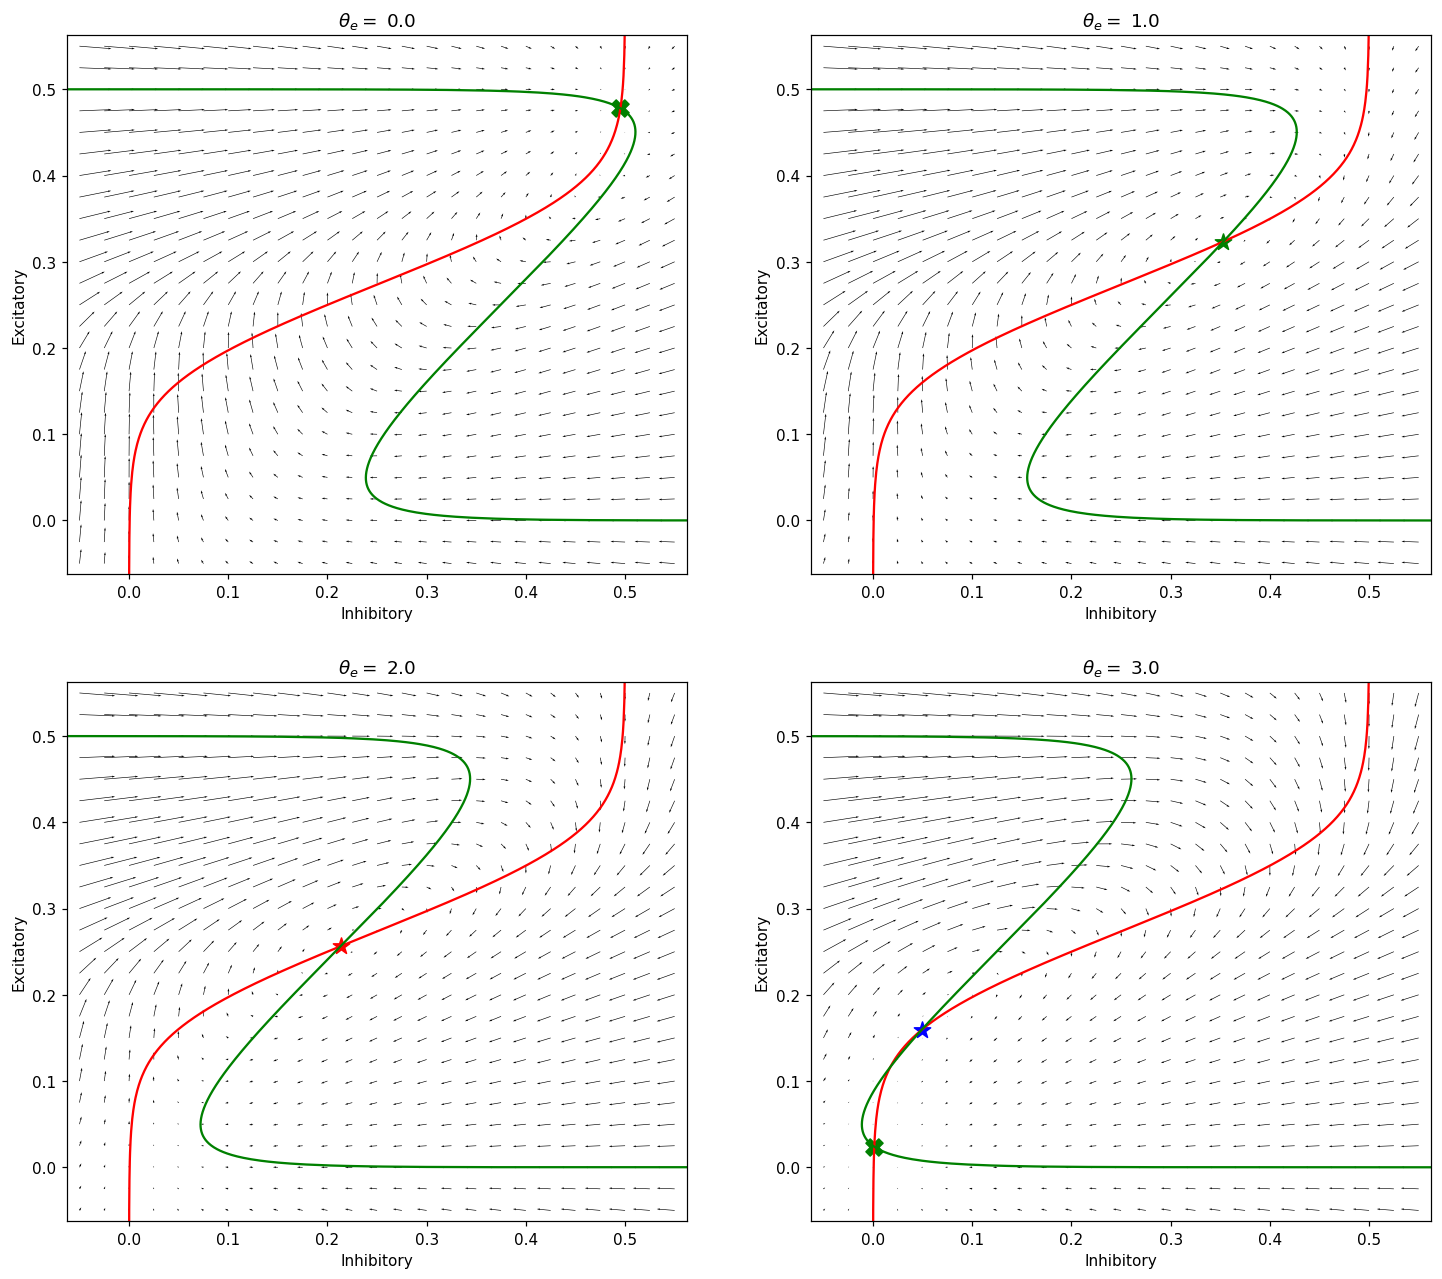

In [12]:
sim_sels = np.arange(parameters.shape[0])
plot_space = np.array([[-0.05,0.55],[-0.05,0.55]])
ncols = 2
subplot_size, ms = [8,7], 125
dpi = 110
titles = [f"{parameter_latex_mapping[bifpar]}$=$ "+ str(round(parameters[sim_sel,parameter_index_mapping[bifpar]],2)) for sim_sel in sim_sels]

nrows = np.ceil(sim_sels.shape[0]/ncols).astype(int)
fig = plt.figure(figsize = (subplot_size[0]*ncols,subplot_size[1]*nrows),dpi = dpi)
for i, sim_sel in enumerate(sim_sels):
    
    ax = plt.subplot(nrows,ncols,1+i)
    Es, Is = get_Es_Is_log_edges(state_space,1500)
    Enull = [Is,fn_E_nullcline(Is, parameters[sim_sel],0)]
    Inull = [fn_I_nullcline(Es, parameters[sim_sel],0),Es]
    plt.plot(Enull[0],Enull[1],"-r", lw = 1.5)
    plt.plot(Inull[0],Inull[1],"-g", lw = 1.5)
    fp_c = np.asarray(fp_class[sim_sel]).flatten()
    fp_color = [fp_coding[f][0] for f in fp_c]
    fp_marker = [fp_coding[f][-1] for f in fp_c]
    coords_x,coords_y = unique_points[sim_sel][:,1].flatten(),unique_points[sim_sel][:,0].flatten()
    for j in range(len(coords_x)):
        plt.scatter(coords_x[j],coords_y[j],c=fp_color[j],marker=fp_marker[j],s=ms)
    Es = np.linspace(plot_space[0][0],plot_space[0][1],25)
    Is = np.linspace(plot_space[1][0],plot_space[1][1],25)
    Edot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    Idot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    for j in range(Es.shape[0]):
        Edot_grid[j] = fn_Edot(Es[j],Is,parameters[sim_sel],0)
        Idot_grid[j] = fn_Idot(Es[j],Is,parameters[sim_sel])
    xgrid, ygrid = np.meshgrid(Is,Es)
    flow = plt.quiver(xgrid,ygrid,Idot_grid,Edot_grid, width = 0.001, angles="xy")
    plt.xlim(plot_space[1][0]-0.0125,plot_space[1][1]+0.0125)
    plt.ylim(plot_space[0][0]-0.0125,plot_space[0][1]+0.0125)
    plt.xlabel("Inhibitory")
    plt.ylabel("Excitatory")
    plt.title(titles[i])
plt.show()

### Newton method weakness: Saddle points

In [13]:
# bifurcation to multistability (1 steady states, 0 saddle) <-> (3 steady states, 1 saddle) <-> (5 steady states, 2 saddle)
bifpar = "theta_e"
bif_space = np.linspace(2.3,2.9,4)
parameters = np.zeros((bif_space.shape[0],parameters_default.shape[0])) + parameters_default[None,:]
parameters[:,parameter_index_mapping["a_i"]] = 1.75
parameters[:,parameter_index_mapping["a_e"]] = 1.75
parameters[:,parameter_index_mapping["theta_i"]] = 3.5
parameters[:,parameter_index_mapping["c_ie"]] = 15.0
parameters[:,parameter_index_mapping["c_ei"]] = 7.5
parameters[:,parameter_index_mapping[bifpar]] = bif_space

In [14]:
n_starts = 200
n_iters = 5000
state_space = np.array([[1e-15,0.5-1e-15],[1e-15,0.5-1e-15]])
unique_points = get_FPs(
                        parameters,  0, state_space, n_starts, n_iters,
                        unique_threshold=5, damp=0.025, init_at_nullclines=True, return_counts = False, edge_res=-3
            )
fp_class = classify_fixed_points(unique_points,parameters,0)[0]

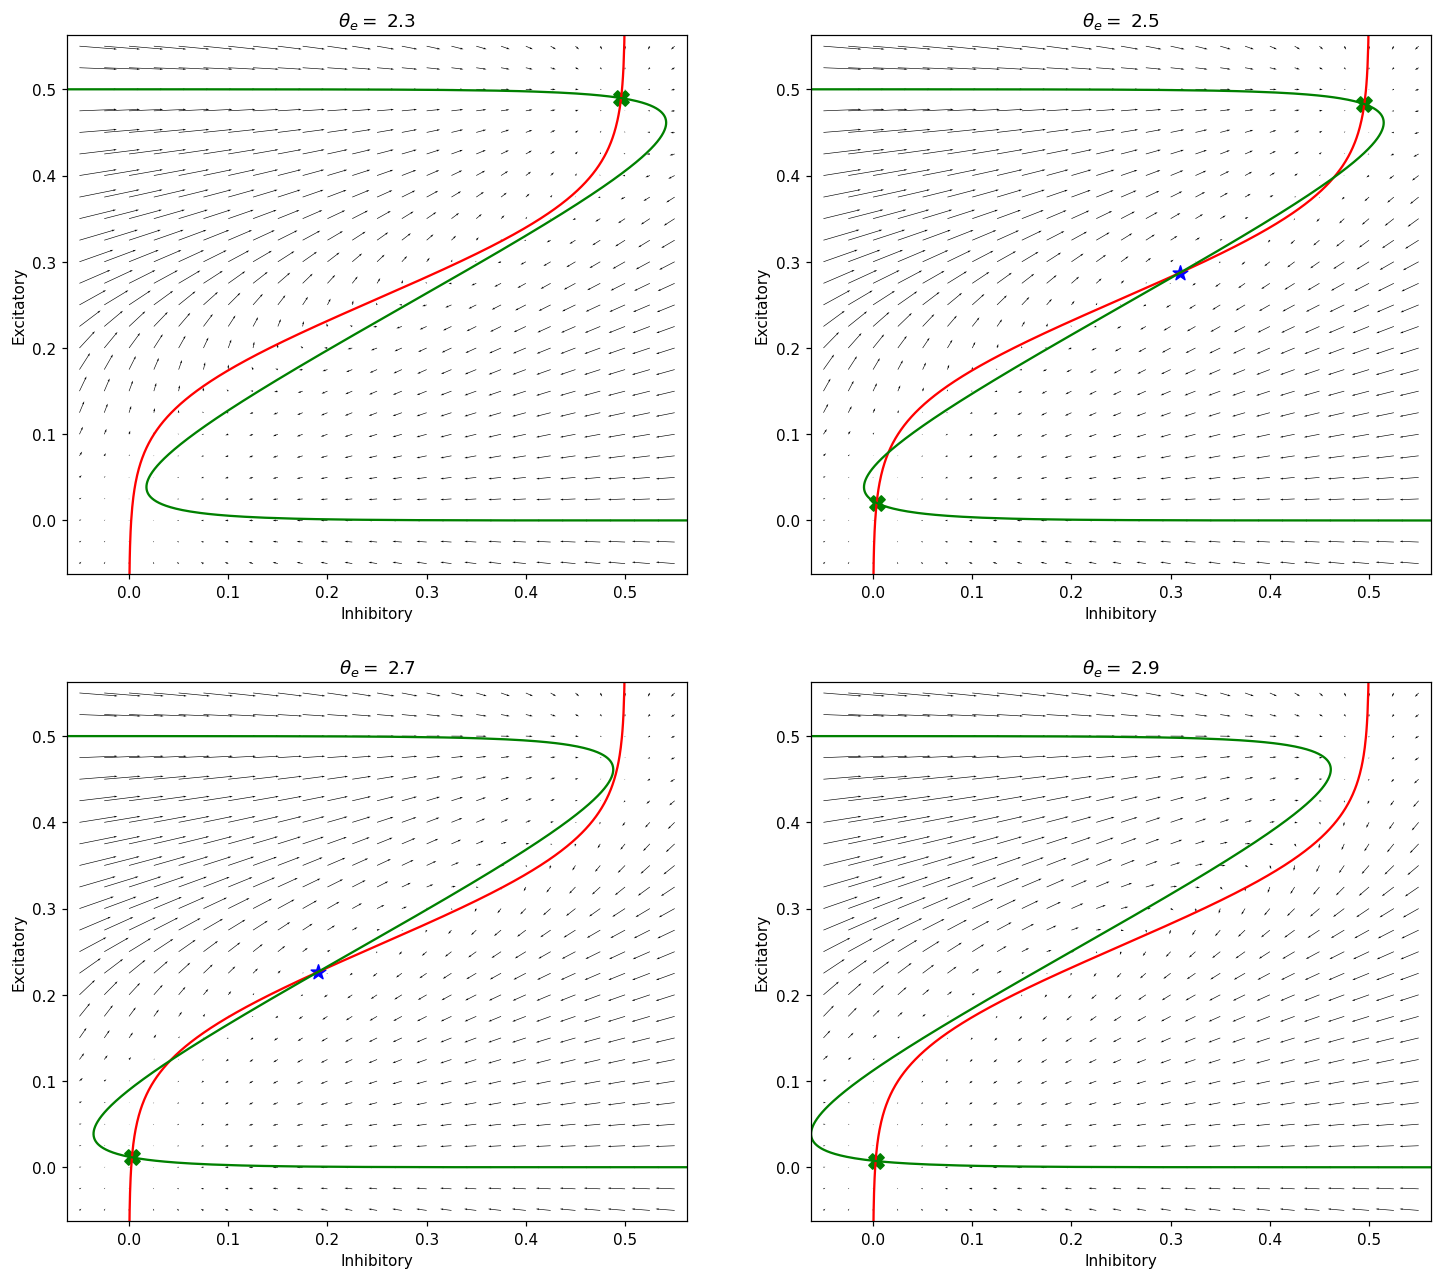

In [15]:
sim_sels = np.arange(parameters.shape[0])
plot_space = np.array([[-0.05,0.55],[-0.05,0.55]])
ncols = 2
subplot_size, ms = [8,7], 100
dpi = 110
titles = [f"{parameter_latex_mapping[bifpar]}$=$ "+ str(round(parameters[sim_sel,parameter_index_mapping[bifpar]],2)) for sim_sel in sim_sels]

nrows = np.ceil(sim_sels.shape[0]/ncols).astype(int)
fig = plt.figure(figsize = (subplot_size[0]*ncols,subplot_size[1]*nrows),dpi = dpi)
for i, sim_sel in enumerate(sim_sels):
    
    ax = plt.subplot(nrows,ncols,1+i)
    Es, Is = get_Es_Is_log_edges(state_space,1500)
    Enull = [Is,fn_E_nullcline(Is, parameters[sim_sel],0)]
    Inull = [fn_I_nullcline(Es, parameters[sim_sel],0),Es]
    plt.plot(Enull[0],Enull[1],"-r", lw = 1.5)
    plt.plot(Inull[0],Inull[1],"-g", lw = 1.5)
    fp_c = np.asarray(fp_class[sim_sel]).flatten()
    fp_color = [fp_coding[f][0] for f in fp_c]
    fp_marker = [fp_coding[f][-1] for f in fp_c]
    coords_x,coords_y = unique_points[sim_sel][:,1].flatten(),unique_points[sim_sel][:,0].flatten()
    for j in range(len(coords_x)):
        plt.scatter(coords_x[j],coords_y[j],c=fp_color[j],marker=fp_marker[j],s=ms)
    Es = np.linspace(plot_space[0][0],plot_space[0][1],25)
    Is = np.linspace(plot_space[1][0],plot_space[1][1],25)
    Edot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    Idot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    for j in range(Es.shape[0]):
        Edot_grid[j] = fn_Edot(Es[j],Is,parameters[sim_sel],0)
        Idot_grid[j] = fn_Idot(Es[j],Is,parameters[sim_sel])
    xgrid, ygrid = np.meshgrid(Is,Es)
    flow = plt.quiver(xgrid,ygrid,Idot_grid,Edot_grid, width = 0.001, angles="xy")
    plt.xlim(plot_space[1][0]-0.0125,plot_space[1][1]+0.0125)
    plt.ylim(plot_space[0][0]-0.0125,plot_space[0][1]+0.0125)
    plt.xlabel("Inhibitory")
    plt.ylabel("Excitatory")
    plt.title(titles[i])
plt.show()

## Adding trajectories

In [16]:
@numba.njit
def simulate_WC_node_ts(
            parameters,
            global_input = 0.0,
            length: float = 12,
            dt: float = 0.5,
            initial_conditions = np.array([0.25,0.25]),
            noise_seed: int = 42,
            store_I: bool = False,
            is_noise_log_scale = True,
            
    ):
    # Input parameters are of shape (num_nodes, num_parameters) to match parameter estimation output, but we need (num_parameters,num_nodes) to simulate
    params = np.zeros_like(parameters.T) + parameters.T
    if is_noise_log_scale:
        #nonoisepar = params[params.shape[0]-2:] == 0
        params[params.shape[0]-2:] = 10**(params[params.shape[0]-2:])
        params[-2,params[-2]==1] = 0
        params[-1,params[-1]==1] = 0 
    # Set seet
    np.random.seed(noise_seed)
    # White noise
    DE, DI = np.sqrt(2*params[-2]* dt), np.sqrt(2*params[-1]* dt)

    #Connectivity delays
    num_nodes = parameters.shape[0] 

    # Equivalent to allocating memory
    sim_length = int(1000/dt*length)

    time_series_E = np.zeros((sim_length+1, int(num_nodes)))
    time_series_I = np.zeros((3,int(num_nodes)))
    if store_I:
        time_series_I = np.empty((sim_length+1,int(num_nodes)))
    time_series_E_temp = np.zeros((1,int(num_nodes)))
    time_series_I_temp = np.zeros((1,int(num_nodes)))
    time_series_E_corr = np.zeros((1,int(num_nodes)))
    time_series_I_corr = np.zeros((1,int(num_nodes)))
    time_series_E_noise = np.zeros((1,int(num_nodes)))
    time_series_I_noise = np.zeros((1,int(num_nodes)))

    # Set initial conditions
    time_series_E[0] = initial_conditions[0]
    time_series_I[0] = initial_conditions[1]
    
    # Heun performed in-place within the time_series_X arrays to maximize speed
    for i in range(int(1000/dt*length)-1):
        # Forward Euler
        j_0 = i
        j_1 = (i+1)
        if not store_I:
            j_0 = i%2
            j_1 = (i+1)%2
        # Calculating input from other nodes
                #               c_ee   *       E          -   c_ei    *        I           -  theta_e  + global_input
        time_series_E[i+1] = params[0] * time_series_E[i] - params[1] * time_series_I[j_0] - params[6]  + global_input
        #                       c_ie   *       E          -   c_ii    *        I           -  theta_i
        time_series_I[j_1] = params[2] * time_series_E[i] - params[3] * time_series_I[j_0] - params[7]
        #                    c_e /  1 +    exp(-  a_e     *    node input E   )      
        time_series_E[i+1] = 1.0 / (1 + np.exp(-params[8] * time_series_E[i+1]))
        #                    c_i /  1 +    exp(-  a_i     *    node input I    )
        time_series_I[j_1] = 1.0 / (1 + np.exp(-params[9] * time_series_I[j_1]))
        #                         (     k_e     -    r_e     *        E       ) *  S_e(input node E) -       E         ) /   tau_e
        time_series_E[i+1] = dt*(((params[10] - params[12] * time_series_E[i]) * time_series_E[i+1]) - time_series_E[i]) / params[4]
        #                         (     k_i     -    r_i     *        I       )  *  S_i(input node I)  -       I       )    /   tau_i 
        time_series_I[j_1] = dt*(((params[11] - params[13] * time_series_I[j_0]) * time_series_I[j_1]) - time_series_I[j_0]) / params[5] 
        time_series_E_temp = time_series_E[i] + time_series_E[i+1] 
        time_series_I_temp = time_series_I[j_0] + time_series_I[j_1]
        # Corrector point
        #                       c_ee   *       E          -   c_ei      *        I           -  theta_e  + global_input
        time_series_E_corr = params[0] * time_series_E_temp - params[1] * time_series_I_temp - params[6] + global_input
        #                       c_ie   *       E            -   c_ii    *        I           -  theta_i
        time_series_I_corr = params[2] * time_series_E_temp - params[3] * time_series_I_temp - params[7]
        #                    c_e /  1 +    exp(-  a_e     *    node input E    )  
        time_series_E_corr = 1.0 / (1 + np.exp(-params[8] * time_series_E_corr))
        #                    c_i /  1 +    exp(-  a_i     *    node input I    )  
        time_series_I_corr = 1.0 / (1 + np.exp(-params[9] * time_series_I_corr))
        #                         (   k_e     -    r_e     *           E       ) *  S_e(input node E)  -       E           ) /   tau_e
        time_series_E_corr = dt*(((params[10] - params[12] * time_series_E_temp) * time_series_E_corr) - time_series_E_temp) / params[4] 
        #                         (   k_i     -    r_i     *           I       ) *  S_i(input node I)  -       I           ) /   tau_i
        time_series_I_corr = dt*(((params[11] - params[13] * time_series_I_temp) * time_series_I_corr) - time_series_I_temp) / params[5]
        # Heun point
        time_series_E_noise = np.random.normal(0,1,size=num_nodes) *  DE 
        time_series_I_noise = np.random.normal(0,1,size=num_nodes) *  DI
        time_series_E[i+1] = time_series_E[i] + (time_series_E[i+1]+time_series_E_corr)/2 + time_series_E_noise
        time_series_I[j_1] = time_series_I[j_0] + (time_series_I[j_1]+time_series_I_corr)/2 + time_series_I_noise
    return time_series_E[:-1].T, time_series_I[:-1].T

In [17]:
# # Hopf bifurcation
bifpar = "theta_e"
bif_space = np.linspace(1.5,3.0,4)
parameters = np.zeros((bif_space.shape[0],parameters_default.shape[0])) + parameters_default[None,:]
parameters[:,parameter_index_mapping["a_i"]] = 1.75
parameters[:,parameter_index_mapping["a_e"]] = 1.3 
parameters[:,parameter_index_mapping["theta_i"]] = 3.5
parameters[:,parameter_index_mapping["c_ie"]] = 15.0
parameters[:,parameter_index_mapping["c_ei"]] = 9.0
parameters[:,parameter_index_mapping[bifpar]] = bif_space


In [18]:
n_starts = 200
n_iters = 5000
state_space = np.array([[1e-15,0.5-1e-15],[1e-15,0.5-1e-15]])
unique_points = get_FPs(
                        parameters,  0, state_space, n_starts, n_iters,
                        unique_threshold=7, damp=0.05, init_at_nullclines=True, return_counts = False
            )
fp_class, lambdas = classify_fixed_points(unique_points,parameters,0)

In [19]:
tsE, tsI = simulate_WC_node_ts(parameters, dt=0.25,length=10,is_noise_log_scale=True, store_I=True, initial_conditions=np.array([.35,0.4]))
tsE_lowE, tsI_lowE = simulate_WC_node_ts(parameters, dt=0.25,length=10,is_noise_log_scale=True, store_I=True, initial_conditions=np.array([.23,0.19]))

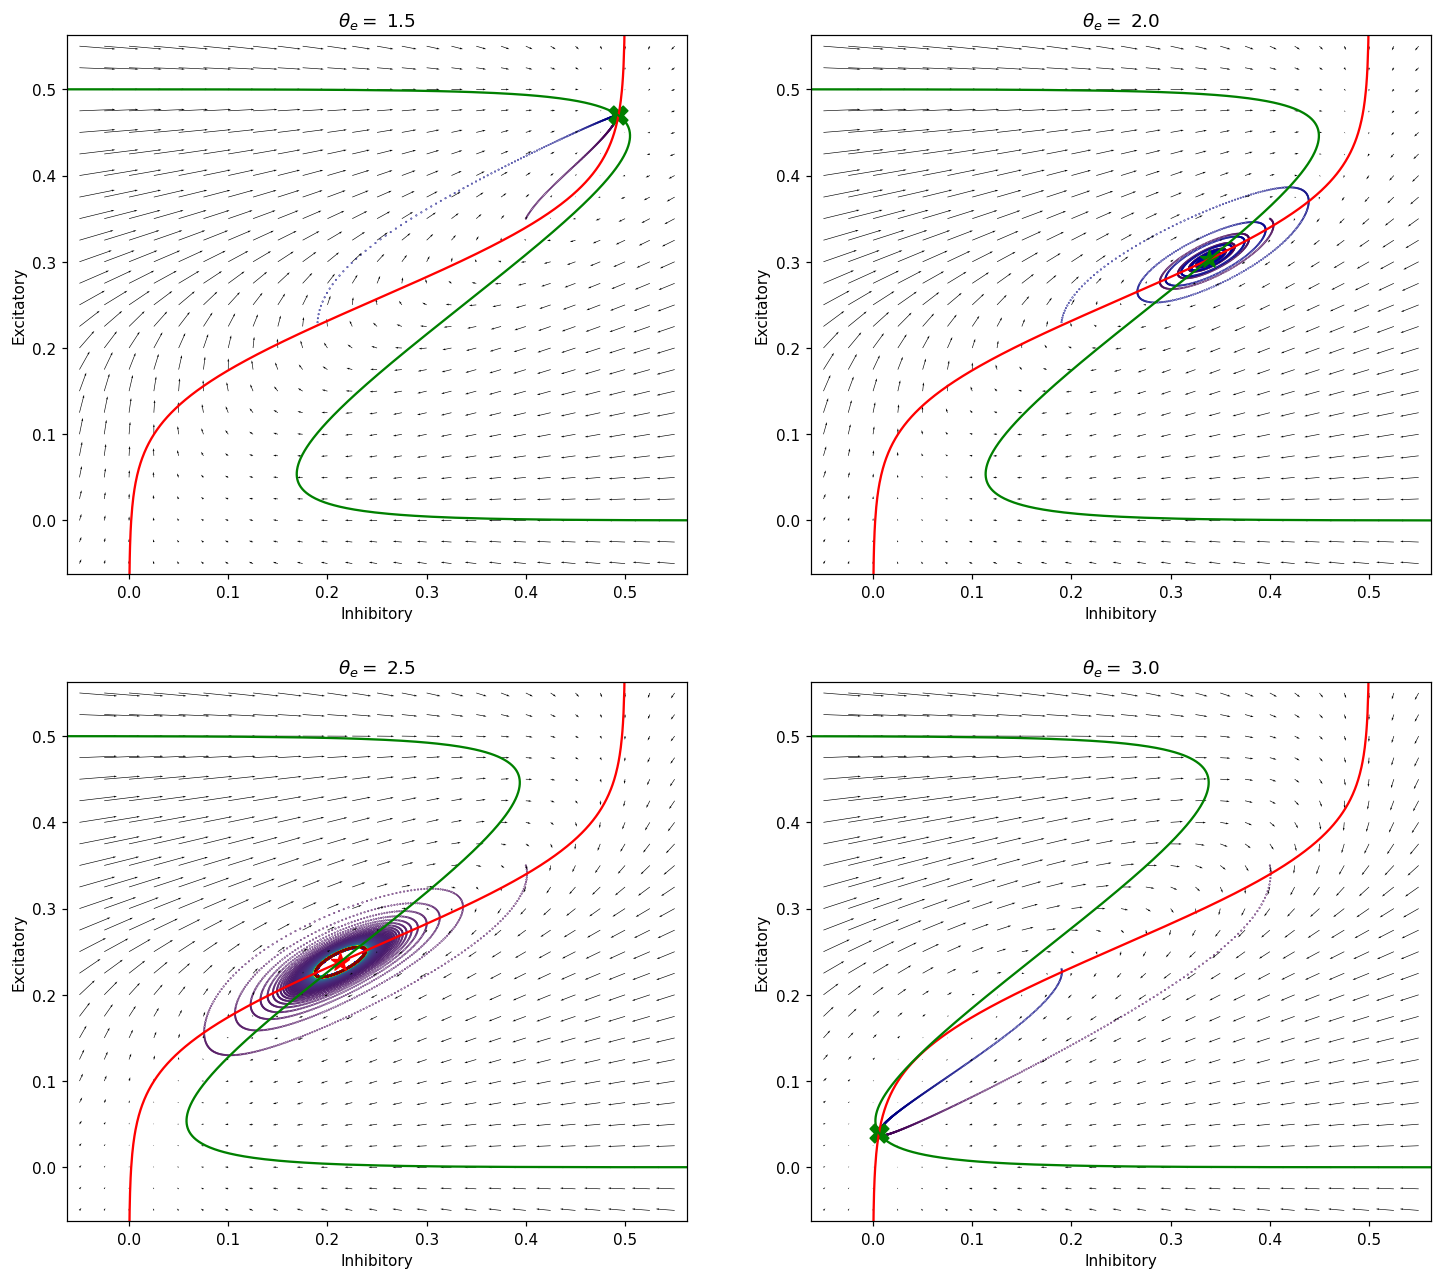

In [20]:
sim_sels = np.arange(parameters.shape[0])
plot_space = np.array([[-0.05,0.55],[-0.05,0.55]])
ncols = 2
subplot_size, ms = [8,7], 150
dpi = 110
titles = [f"{parameter_latex_mapping[bifpar]}$=$ "+ str(round(parameters[sim_sel,parameter_index_mapping[bifpar]],2)) for sim_sel in sim_sels]

nrows = np.ceil(sim_sels.shape[0]/ncols).astype(int)
fig = plt.figure(figsize = (subplot_size[0]*ncols,subplot_size[1]*nrows),dpi = dpi)
for i, sim_sel in enumerate(sim_sels):
    ax = plt.subplot(nrows,ncols,1+i)
    plt.scatter(tsI[sim_sel],tsE[sim_sel], c = np.arange(tsE[sim_sel].shape[0]), s=0.1, cmap = "viridis")
    plt.scatter(tsI_lowE[sim_sel],tsE_lowE[sim_sel], c = np.arange(tsE_lowE[sim_sel].shape[0]), s=0.1, cmap = "jet")
    Es, Is = get_Es_Is_log_edges(state_space,1500)
    Enull = [Is,fn_E_nullcline(Is, parameters[sim_sel],0)]
    Inull = [fn_I_nullcline(Es, parameters[sim_sel],0),Es]
    plt.plot(Enull[0],Enull[1],"-r", lw = 1.5)
    plt.plot(Inull[0],Inull[1],"-g", lw = 1.5)
    fp_c = np.asarray(fp_class[sim_sel]).flatten()
    fp_color = [fp_coding[f][0] for f in fp_c]
    fp_marker = [fp_coding[f][-1] for f in fp_c]
    coords_x,coords_y = unique_points[sim_sel][:,1].flatten(),unique_points[sim_sel][:,0].flatten()
    for j in range(len(coords_x)):
        plt.scatter(coords_x[j],coords_y[j],c=fp_color[j],marker=fp_marker[j],s=ms)
    Es = np.linspace(plot_space[0][0],plot_space[0][1],25)
    Is = np.linspace(plot_space[1][0],plot_space[1][1],25)
    Edot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    Idot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    for j in range(Es.shape[0]):
        Edot_grid[j] = fn_Edot(Es[j],Is,parameters[sim_sel],0)
        Idot_grid[j] = fn_Idot(Es[j],Is,parameters[sim_sel])
    xgrid, ygrid = np.meshgrid(Is,Es)
    flow = plt.quiver(xgrid,ygrid,Idot_grid,Edot_grid, width = 0.001, angles="xy")
    plt.xlim(plot_space[1][0]-0.0125,plot_space[1][1]+0.0125)
    plt.ylim(plot_space[0][0]-0.0125,plot_space[0][1]+0.0125)
    plt.xlabel("Inhibitory")
    plt.ylabel("Excitatory")
    plt.title(titles[i])
plt.show()


### Cycle vs Multistability without noise

In [21]:
# bifurcation to multistability (1 cycle, 0 saddle) <-> (5 steady states, 2 saddle)
bifpar = "a_e"
bif_space = 1.5 + np.linspace(0,0.30,4)
parameters = np.zeros((bif_space.shape[0],parameters_default.shape[0])) + parameters_default[None,:]
parameters[:,parameter_index_mapping["a_i"]] = 1.5
parameters[:,parameter_index_mapping["a_e"]] = bif_space
parameters[:,parameter_index_mapping["theta_i"]] = 3.5
parameters[:,parameter_index_mapping["c_ie"]] = 15.0
parameters[:,parameter_index_mapping["c_ei"]] = 8.0
parameters[:,parameter_index_mapping["theta_e"]] = 2.42


In [22]:
n_starts = 200
n_iters = 5000
state_space = np.array([[1e-15,0.5-1e-15],[1e-15,0.5-1e-15]])
unique_points = get_FPs(
                        parameters,  0, state_space, n_starts, n_iters,
                        unique_threshold=7, damp=0.05, init_at_nullclines=True, return_counts = False
            )
fp_class = classify_fixed_points(unique_points,parameters,0)[0]

In [23]:
tsE, tsI = simulate_WC_node_ts(parameters, dt=0.1,length=5,is_noise_log_scale=True, store_I=True, initial_conditions=np.array([.35,0.4]))
tsE_lowE, tsI_lowE = simulate_WC_node_ts(parameters, dt=0.1,length=5,is_noise_log_scale=True, store_I=True, initial_conditions=np.array([.15,0.1]),noise_seed=41)

Note that close to the bifurcation the limit cycle is labelled as unstable focus (red star) because the global behavior takes over the local behavior near bifurcation in this case here.

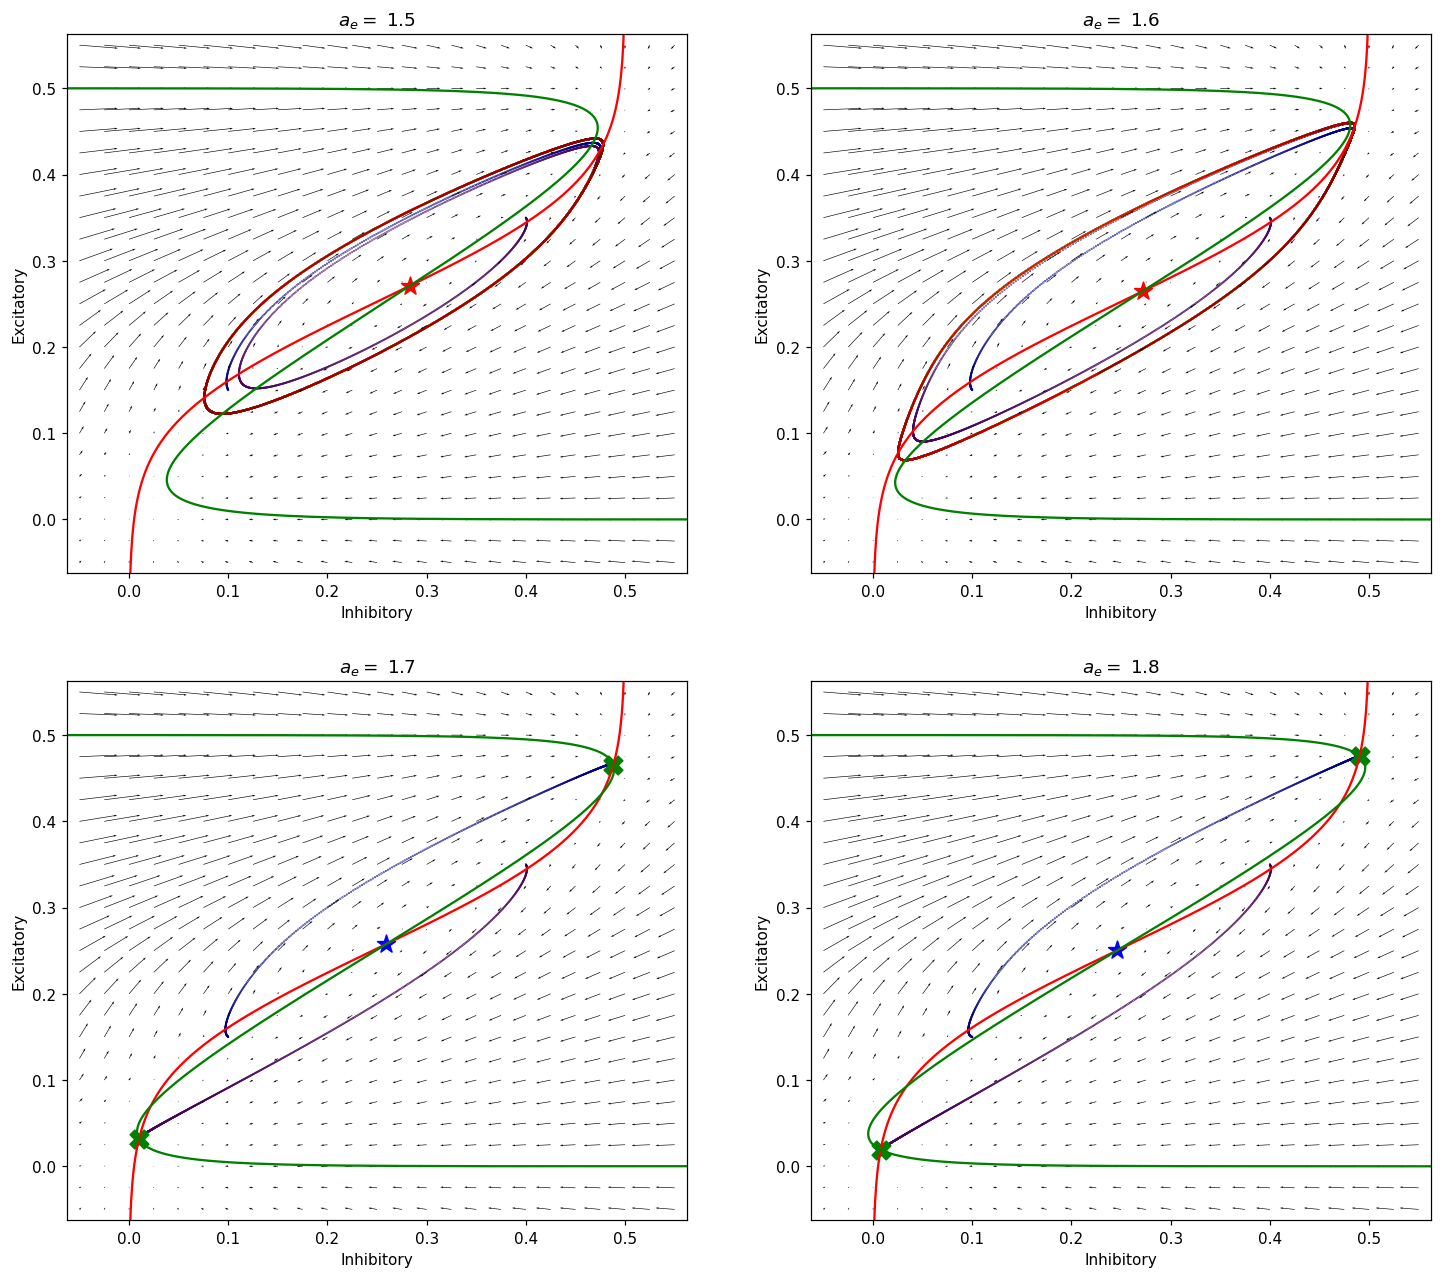

In [24]:
sim_sels = np.arange(parameters.shape[0])
plot_space = np.array([[-0.05,0.55],[-0.05,0.55]])
ncols = 2
subplot_size, ms = [8,7], 150
dpi = 110
titles = [f"{parameter_latex_mapping[bifpar]}$=$ "+ str(round(parameters[sim_sel,parameter_index_mapping[bifpar]],2)) for sim_sel in sim_sels]

nrows = np.ceil(sim_sels.shape[0]/ncols).astype(int)
fig = plt.figure(figsize = (subplot_size[0]*ncols,subplot_size[1]*nrows),dpi = dpi)
for i, sim_sel in enumerate(sim_sels):
    ax = plt.subplot(nrows,ncols,1+i)
    plt.scatter(tsI[sim_sel],tsE[sim_sel], c = np.arange(tsE[sim_sel].shape[0]), s=0.1, cmap = "viridis")
    plt.scatter(tsI_lowE[sim_sel],tsE_lowE[sim_sel], c = np.arange(tsE_lowE[sim_sel].shape[0]), s=0.1, cmap = "jet")
    Es, Is = get_Es_Is_log_edges(state_space,1500)
    Enull = [Is,fn_E_nullcline(Is, parameters[sim_sel],0)]
    Inull = [fn_I_nullcline(Es, parameters[sim_sel],0),Es]
    plt.plot(Enull[0],Enull[1],"-r", lw = 1.5)
    plt.plot(Inull[0],Inull[1],"-g", lw = 1.5)
    fp_c = np.asarray(fp_class[sim_sel]).flatten()
    fp_color = [fp_coding[f][0] for f in fp_c]
    fp_marker = [fp_coding[f][-1] for f in fp_c]
    coords_x,coords_y = unique_points[sim_sel][:,1].flatten(),unique_points[sim_sel][:,0].flatten()
    for j in range(len(coords_x)):
        plt.scatter(coords_x[j],coords_y[j],c=fp_color[j],marker=fp_marker[j],s=ms)
    Es = np.linspace(plot_space[0][0],plot_space[0][1],25)
    Is = np.linspace(plot_space[1][0],plot_space[1][1],25)
    Edot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    Idot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    for j in range(Es.shape[0]):
        Edot_grid[j] = fn_Edot(Es[j],Is,parameters[sim_sel],0)
        Idot_grid[j] = fn_Idot(Es[j],Is,parameters[sim_sel])
    xgrid, ygrid = np.meshgrid(Is,Es)
    flow = plt.quiver(xgrid,ygrid,Idot_grid,Edot_grid, width = 0.001, angles="xy")
    plt.xlim(plot_space[1][0]-0.0125,plot_space[1][1]+0.0125)
    plt.ylim(plot_space[0][0]-0.0125,plot_space[0][1]+0.0125)
    plt.xlabel("Inhibitory")
    plt.ylabel("Excitatory")
    plt.title(titles[i])
plt.show()


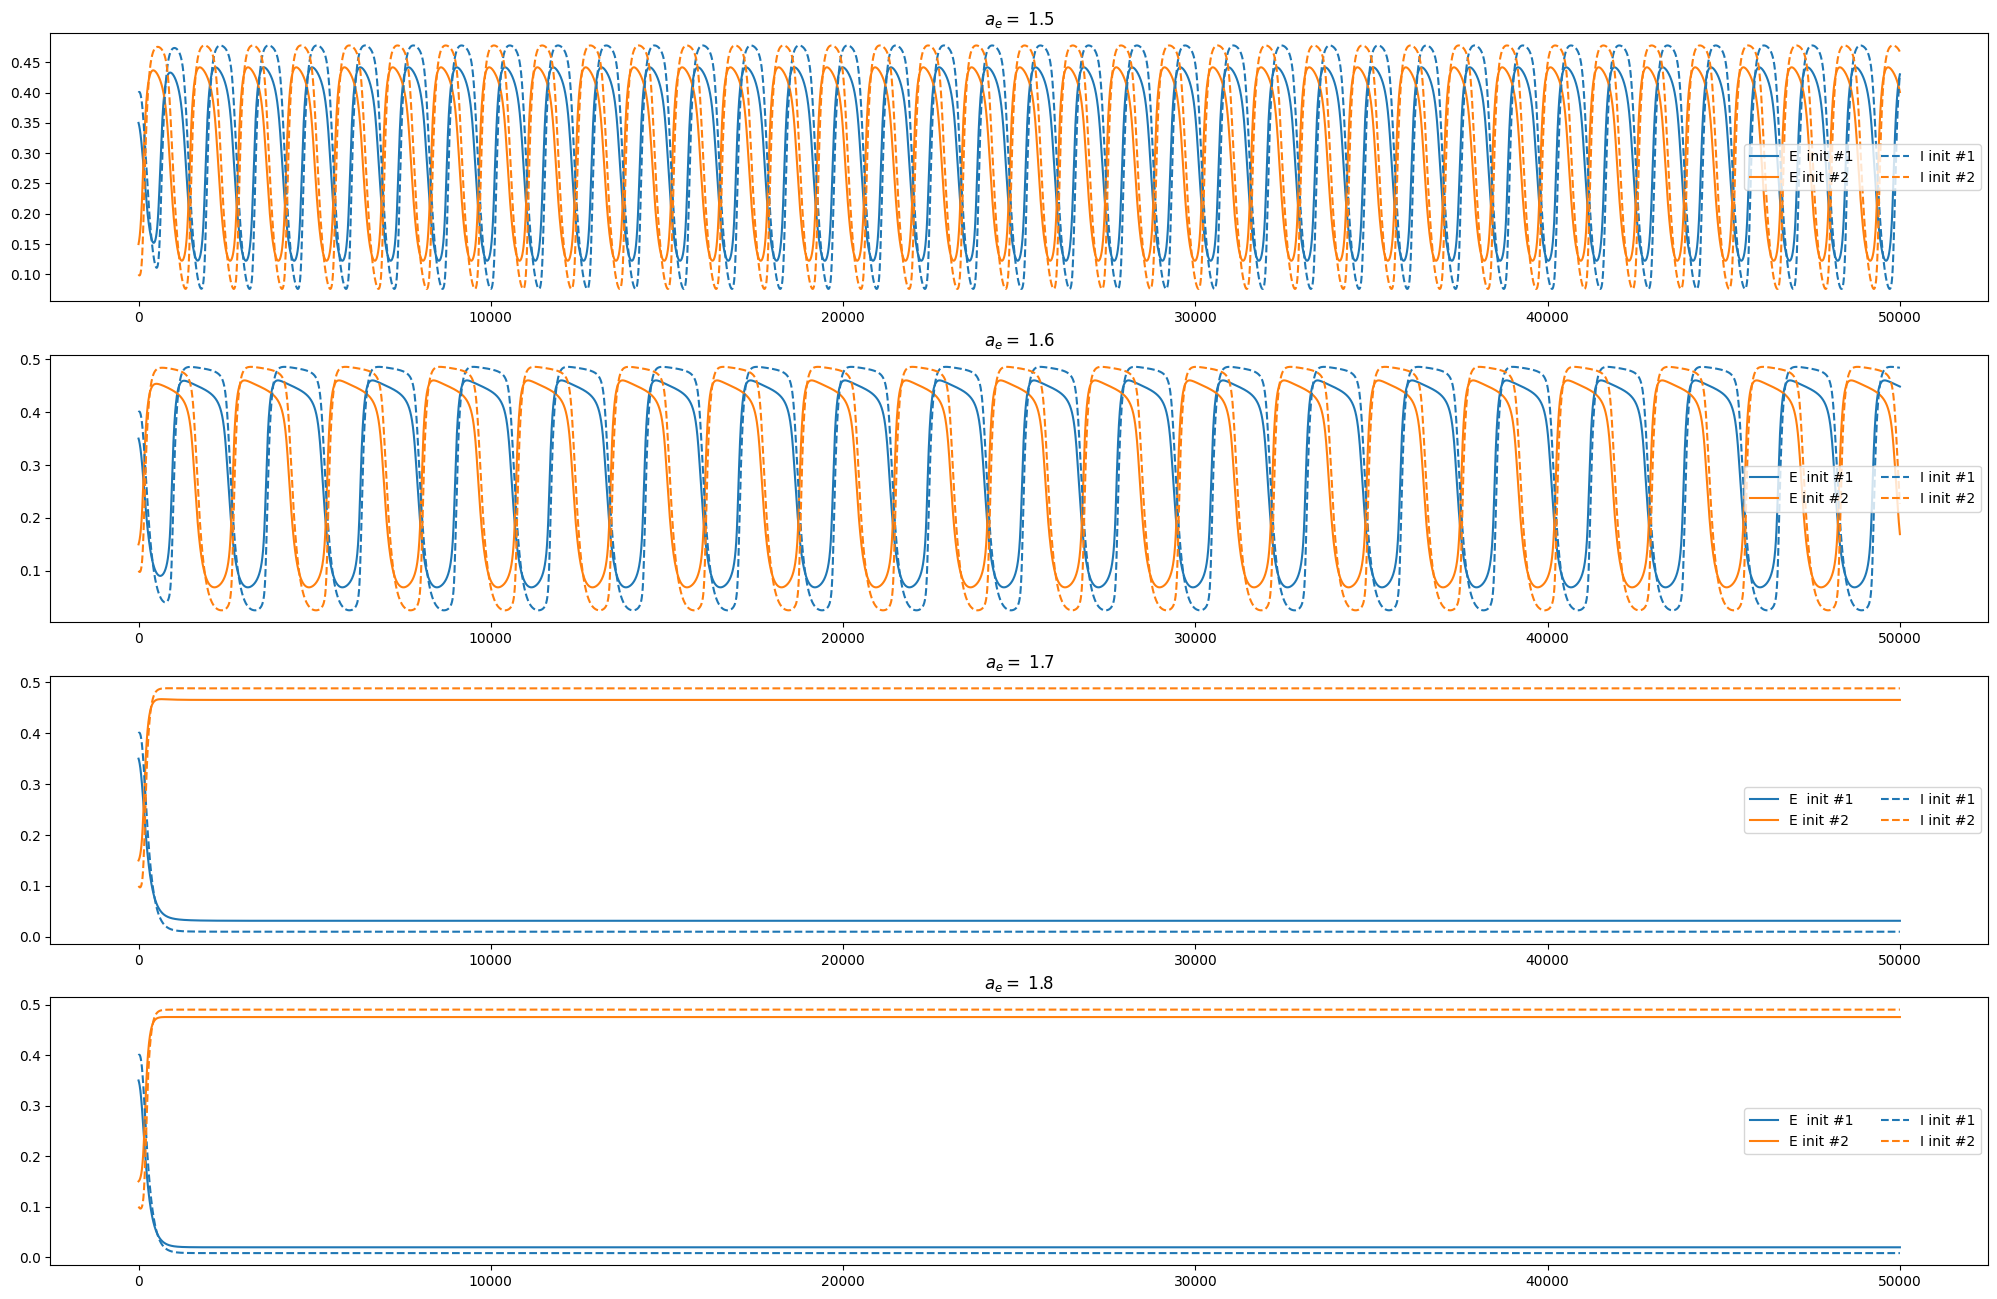

In [25]:
sim_sels = np.arange(parameters.shape[0])
titles = [f"{parameter_latex_mapping[bifpar]}$=$ "+ str(round(parameters[sim_sel,parameter_index_mapping[bifpar]],2)) for sim_sel in sim_sels]
fig = plt.figure(figsize = (25,4*sim_sels.shape[0]))
for i, sim_sel in enumerate(sim_sels):
    ax = plt.subplot(sim_sels.shape[0],1,1+i)
    plt.plot(tsE[sim_sel],'-C0', label="E  init #1")
    plt.plot(tsE_lowE[sim_sel],'-C1',label='E init #2')
    plt.plot(tsI[sim_sel],'--C0', label="I init #1")
    plt.plot(tsI_lowE[sim_sel],'--C1', label="I init #2")
    plt.legend(ncol=2)
    plt.title(titles[i])
plt.show()

### Cycle vs Multistability with noise

In [26]:
parameters[:,-2:] = -4.5
n_starts = 200
n_iters = 5000
state_space = np.array([[1e-15,0.5-1e-15],[1e-15,0.5-1e-15]])
unique_points = get_FPs(
                        parameters,  0, state_space, n_starts, n_iters,
                        unique_threshold=7, damp=0.05, init_at_nullclines=True, return_counts = False
            )
fp_class = classify_fixed_points(unique_points,parameters,0)[0]

In [27]:
tsE, tsI = simulate_WC_node_ts(parameters, dt=0.1,length=5,is_noise_log_scale=True, store_I=True, initial_conditions=np.array([.35,0.4]))
tsE_lowE, tsI_lowE = simulate_WC_node_ts(parameters, dt=0.1,length=5,is_noise_log_scale=True, store_I=True, initial_conditions=np.array([.15,0.1]),noise_seed=41)

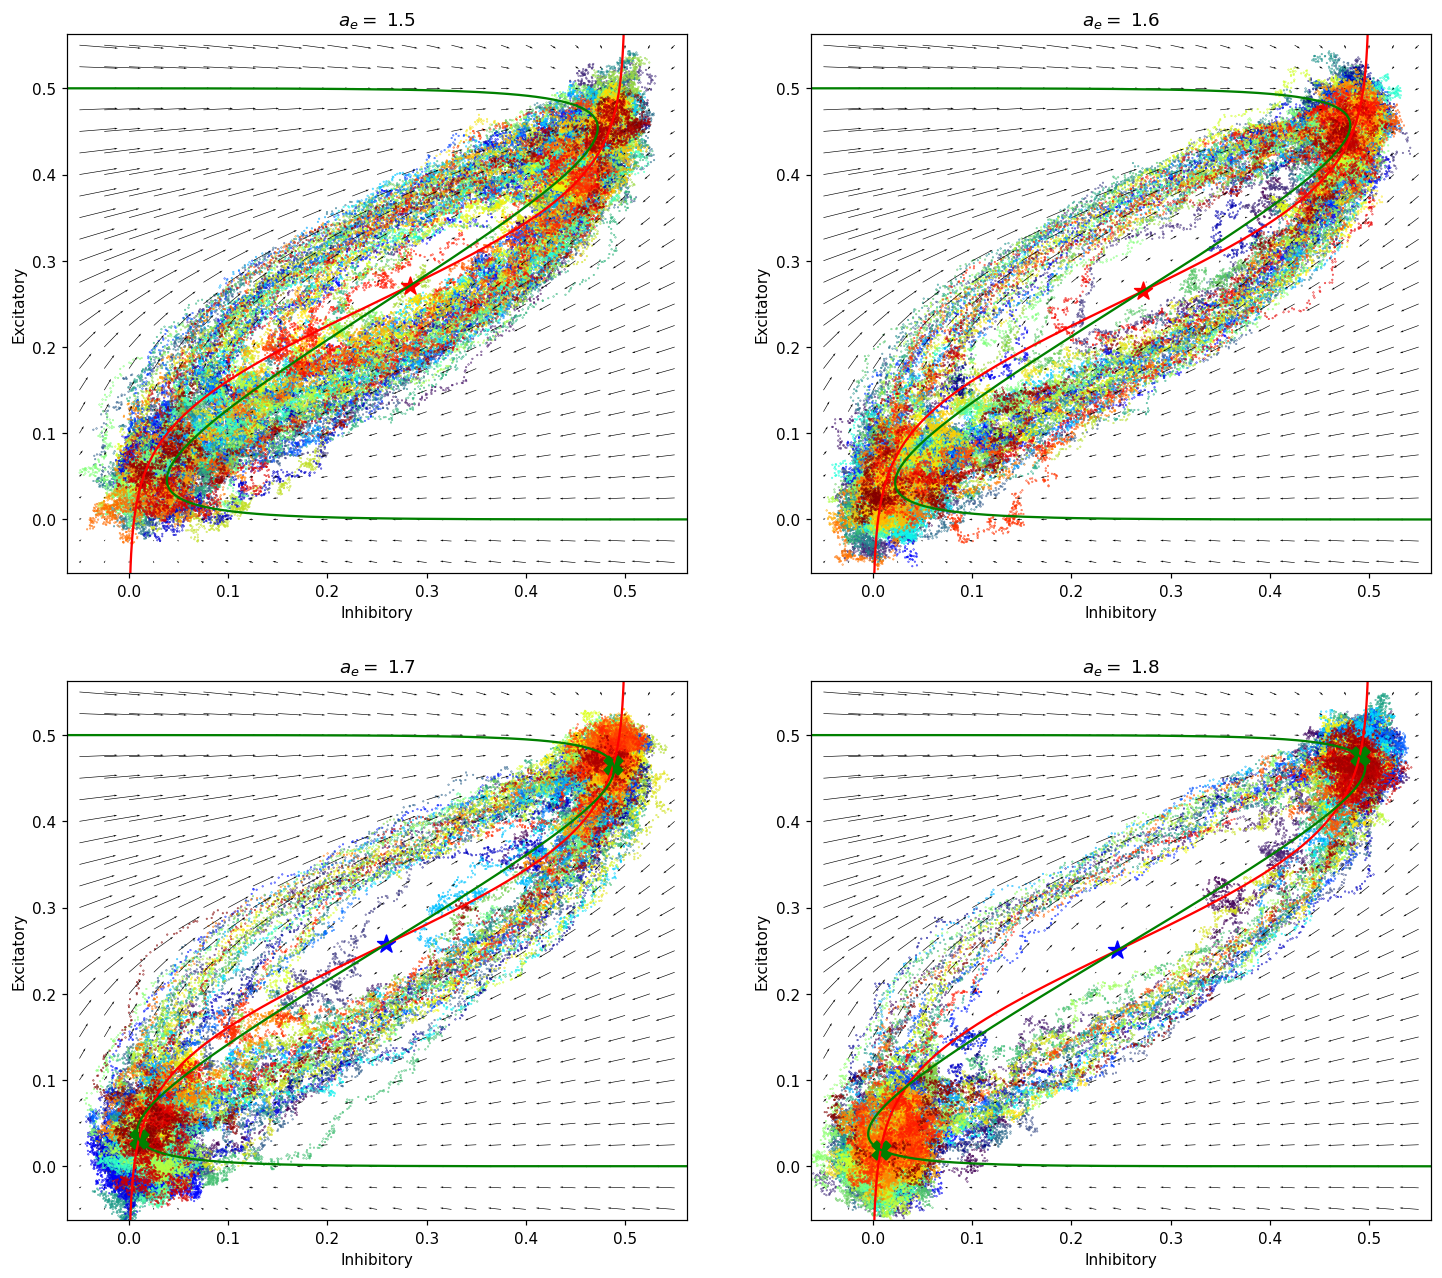

In [28]:
sim_sels = np.arange(parameters.shape[0])
plot_space = np.array([[-0.05,0.55],[-0.05,0.55]])
ncols = 2
subplot_size, ms = [8,7], 150
dpi = 110
titles = [f"{parameter_latex_mapping[bifpar]}$=$ "+ str(round(parameters[sim_sel,parameter_index_mapping[bifpar]],2)) for sim_sel in sim_sels]

nrows = np.ceil(sim_sels.shape[0]/ncols).astype(int)
fig = plt.figure(figsize = (subplot_size[0]*ncols,subplot_size[1]*nrows),dpi = dpi)
for i, sim_sel in enumerate(sim_sels):
    ax = plt.subplot(nrows,ncols,1+i)
    plt.scatter(tsI[sim_sel],tsE[sim_sel], c = np.arange(tsE[sim_sel].shape[0]), s=0.1, cmap = "viridis")
    plt.scatter(tsI_lowE[sim_sel],tsE_lowE[sim_sel], c = np.arange(tsE_lowE[sim_sel].shape[0]), s=0.1, cmap = "jet")
    Es, Is = get_Es_Is_log_edges(state_space,1500)
    Enull = [Is,fn_E_nullcline(Is, parameters[sim_sel],0)]
    Inull = [fn_I_nullcline(Es, parameters[sim_sel],0),Es]
    plt.plot(Enull[0],Enull[1],"-r", lw = 1.5)
    plt.plot(Inull[0],Inull[1],"-g", lw = 1.5)
    fp_c = np.asarray(fp_class[sim_sel]).flatten()
    fp_color = [fp_coding[f][0] for f in fp_c]
    fp_marker = [fp_coding[f][-1] for f in fp_c]
    coords_x,coords_y = unique_points[sim_sel][:,1].flatten(),unique_points[sim_sel][:,0].flatten()
    for j in range(len(coords_x)):
        plt.scatter(coords_x[j],coords_y[j],c=fp_color[j],marker=fp_marker[j],s=ms)
    Es = np.linspace(plot_space[0][0],plot_space[0][1],25)
    Is = np.linspace(plot_space[1][0],plot_space[1][1],25)
    Edot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    Idot_grid = np.zeros((Es.shape[0],Is.shape[0]))
    for j in range(Es.shape[0]):
        Edot_grid[j] = fn_Edot(Es[j],Is,parameters[sim_sel],0)
        Idot_grid[j] = fn_Idot(Es[j],Is,parameters[sim_sel])
    xgrid, ygrid = np.meshgrid(Is,Es)
    flow = plt.quiver(xgrid,ygrid,Idot_grid,Edot_grid, width = 0.001, angles="xy")
    plt.xlim(plot_space[1][0]-0.0125,plot_space[1][1]+0.0125)
    plt.ylim(plot_space[0][0]-0.0125,plot_space[0][1]+0.0125)
    plt.xlabel("Inhibitory")
    plt.ylabel("Excitatory")
    plt.title(titles[i])
plt.show()


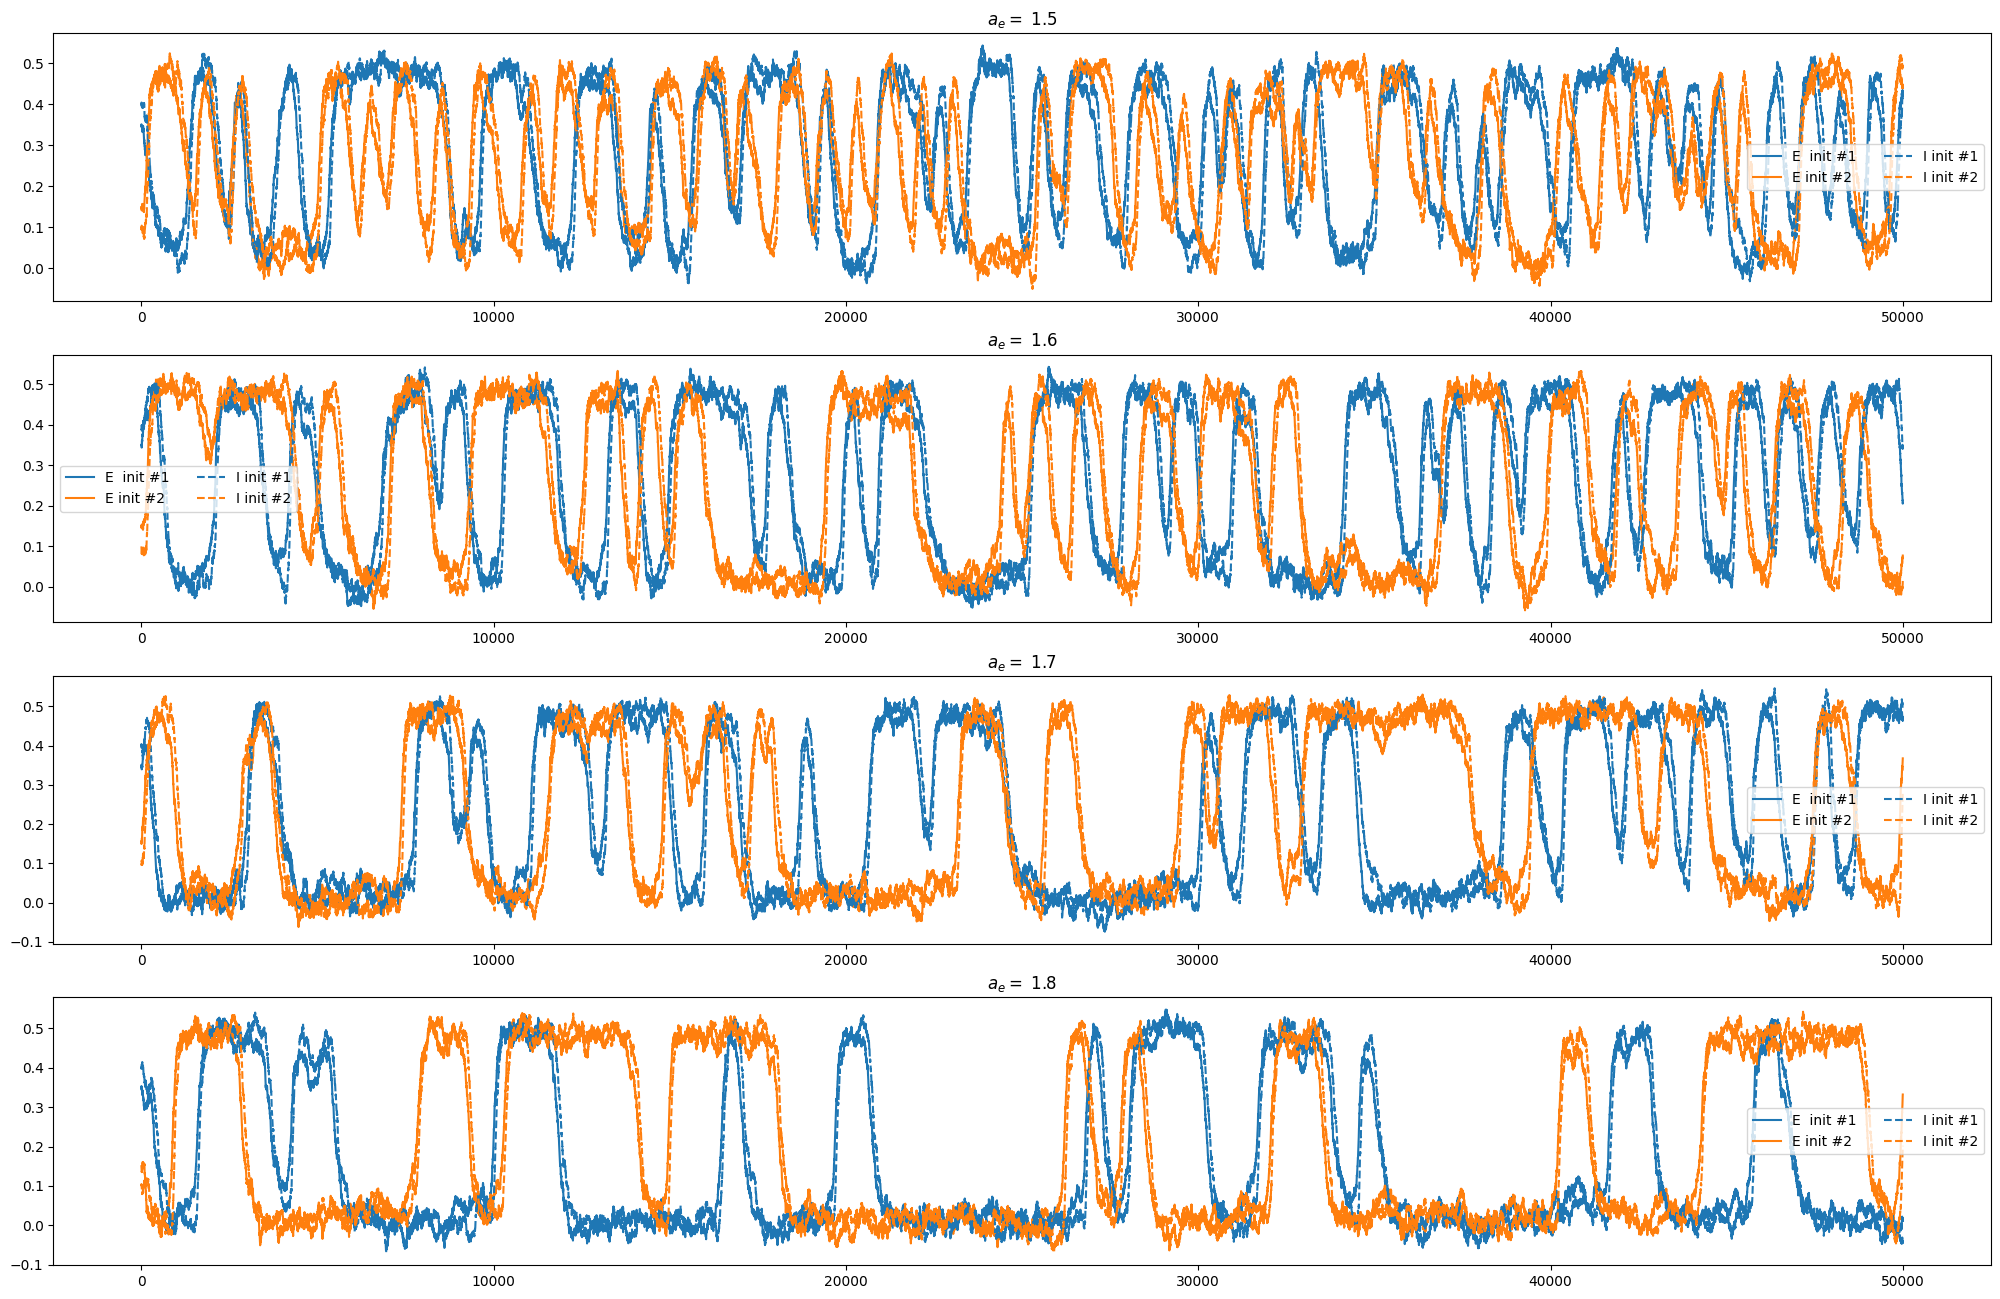

In [29]:
sim_sels = np.arange(parameters.shape[0])
titles = ["$a_e=$ "+ str(round(parameters[sim_sel,parameter_index_mapping["a_e"]],2)) for sim_sel in sim_sels]
fig = plt.figure(figsize = (25,4*sim_sels.shape[0]))
for i, sim_sel in enumerate(sim_sels):
    ax = plt.subplot(sim_sels.shape[0],1,1+i)
    plt.plot(tsE[sim_sel],'-C0', label="E  init #1")
    plt.plot(tsE_lowE[sim_sel],'-C1',label='E init #2')
    plt.plot(tsI[sim_sel],'--C0', label="I init #1")
    plt.plot(tsI_lowE[sim_sel],'--C1', label="I init #2")
    plt.legend(ncol=2)
    plt.title(titles[i])
plt.show()